#### 1. Import the necessary libraries.

In [20]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")

#### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df



In [21]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [22]:
# %run (r'C:\Users\JT\OneDrive - UNIR\Certificaciones\IronHack\IH-Labs\metodos.ipynb')

#### 3. First look at its main features (head, shape, info).



In [23]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [24]:
customer_df.shape

(9134, 24)

In [25]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [26]:
def lowercase(data):
    lower_case_columns = []
    for columns in data.columns:
        lower_case_columns.append(columns.lower())
    data.columns = lower_case_columns
    return data
# lowercase(customer_df)

#### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)



In [27]:
def snake_case(data):
    lower_case_columns = []
    for columns in data.columns:
        # if ' ' in columns:
        #     columns = columns.replace(' ', '_')   # This is the same but iterating
        lower_case_columns.append(columns.lower())
        
    data.columns = lower_case_columns
    data.columns = data.columns.str.replace(' ','_')
    return data

In [28]:
snake_case(customer_df)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


#### 5. Change effective to date column to datetime format.



In [29]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
# customer_df['months'] = customer_df['effective_to_date'].dt.month

In [30]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [31]:
customer_df.tail()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2011-02-14,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


#### 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df



General solution for counting the values of wach columns

In [47]:
def unique_values(data):
    for column in data.columns:
        print(column, len(data[column].unique()))

In [48]:
unique_values(customer_df)

customer 9134
state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employmentstatus 5
gender 2
income 5694
location_code 3
marital_status 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
total_claim_amount 5106
vehicle_class 6
vehicle_size 3


Specific solution

In [32]:
for column in customer_df.columns:
    print(column, len(customer_df[column].unique()))

# The same operation, different function

# for column in customer_df.columns:
#     print(column, len(customer_df[column].value_counts()))

customer 9134
state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employmentstatus 5
gender 2
income 5694
location_code 3
marital_status 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
total_claim_amount 5106
vehicle_class 6
vehicle_size 3


In [43]:
customer_df.shape[0]*0.01

91.34

We can see from the number of unique values that each column has which one is discrete and which one continuous

In [33]:
def c_d(data):
    
    discrete = pd.DataFrame()
    continuous = pd.DataFrame()
    
    for name in data.columns:
        if len(data[name].unique()) < data.shape[0]*0.01:
            discrete[name]=data[name]
        else:
            continuous[name]=data[name]
            
    return discrete, continuous

discrete_df, continuous_df = c_d(customer_df)

The limit we set for the continuous and the discrete variables is 1% of the number of rows of the dataset

#### 7. Plot a correlation matrix, comment what you see.



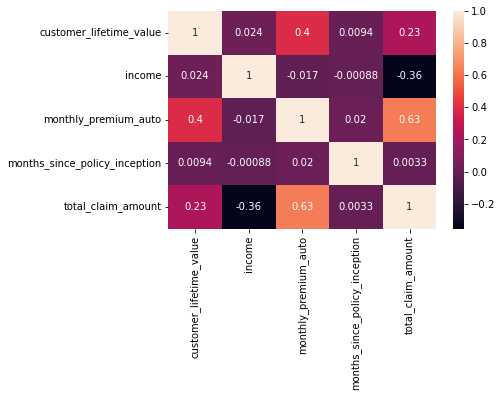

In [34]:
correlations_matrix = continuous_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#### 8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)



Discrete values plots

In [51]:
def pintar_histogramas(data):
    data.drop(['effective_to_date'], axis=1, inplace=True)
    for column in data.columns:
        print(column,'has', len(data[column].unique()), 'categories')
        sns.countplot(data[column])
        plt.show()
    return

Histograms are worth it for discrete values

state has 5 categories


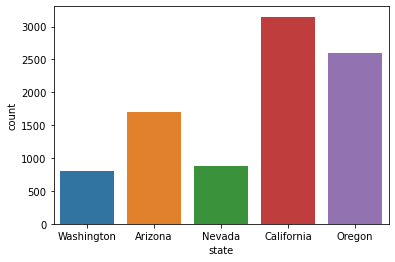

response has 2 categories


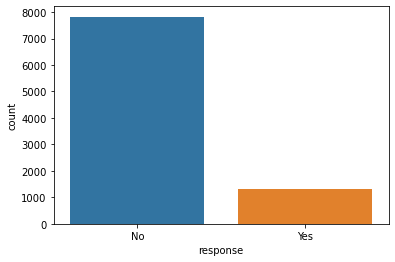

coverage has 3 categories


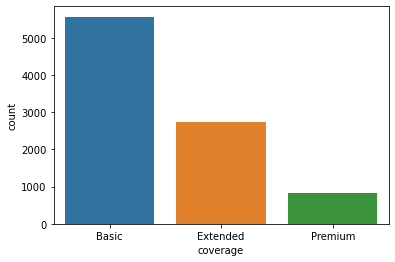

education has 5 categories


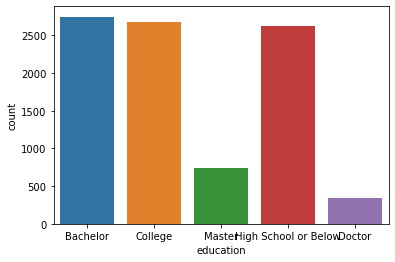

employmentstatus has 5 categories


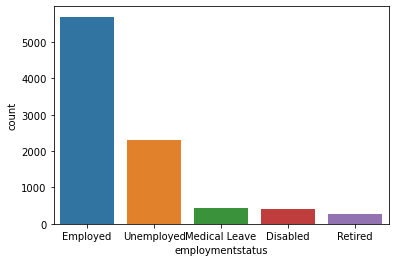

gender has 2 categories


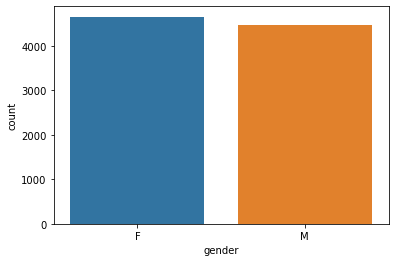

location_code has 3 categories


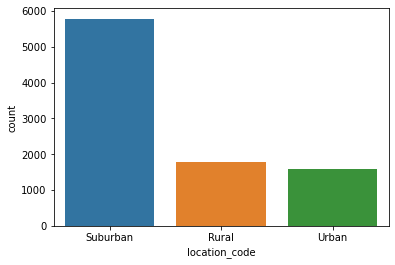

marital_status has 3 categories


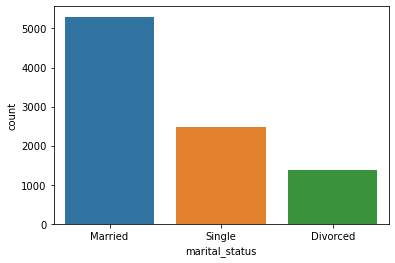

months_since_last_claim has 36 categories


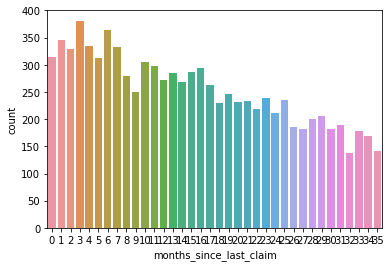

number_of_open_complaints has 6 categories


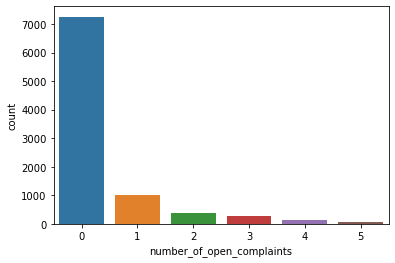

number_of_policies has 9 categories


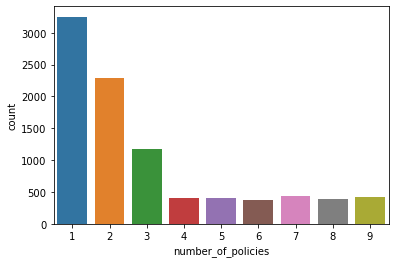

policy_type has 3 categories


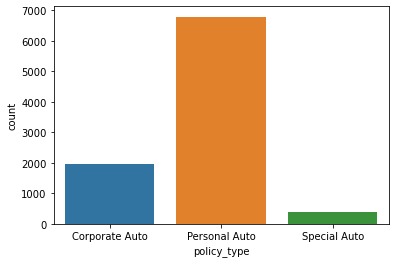

policy has 9 categories


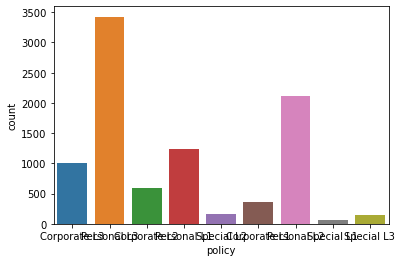

renew_offer_type has 4 categories


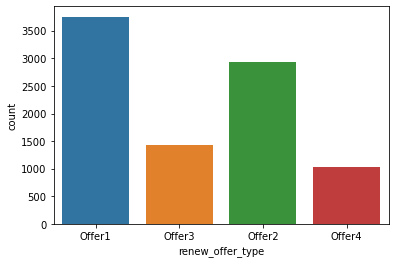

sales_channel has 4 categories


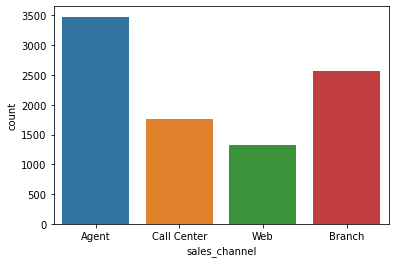

vehicle_class has 6 categories


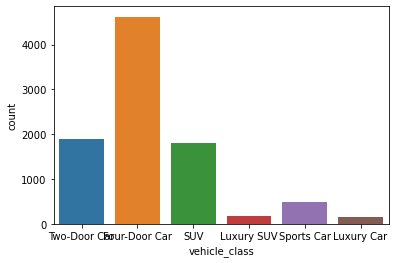

vehicle_size has 3 categories


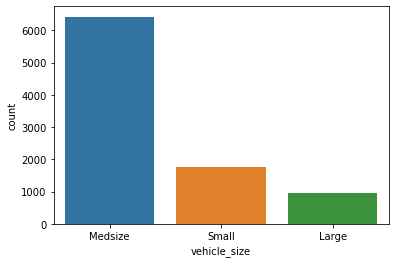

In [52]:
pintar_histogramas(discrete_df)

Continuous variables plots

In [37]:
def pintar_displot(sub_set):
    for i in sub_set.drop(['customer'], axis = 1).columns:
        sns.displot(data=sub_set, x=i, kde = True)
    return

We drop customer and effective to date due to they are meaningless to plot

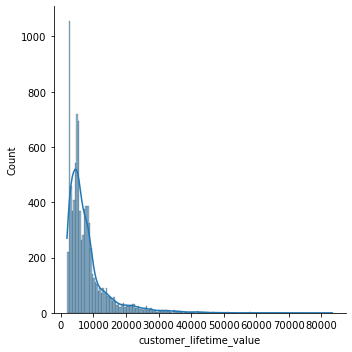

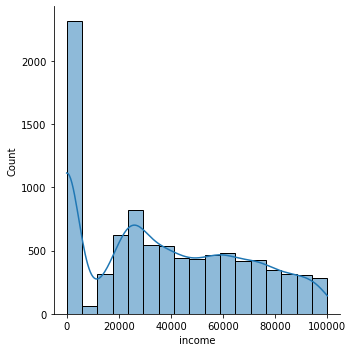

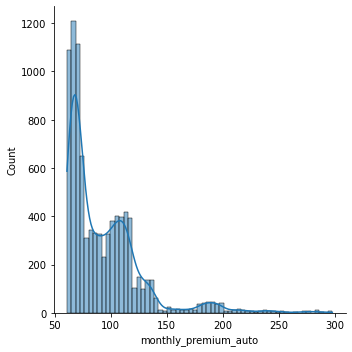

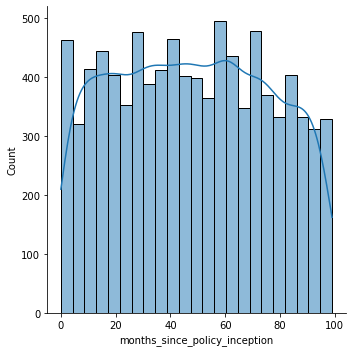

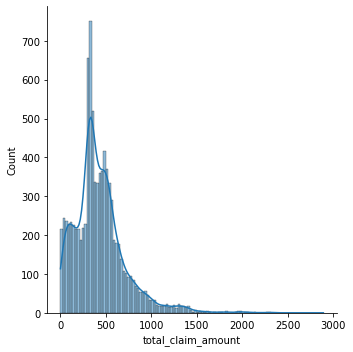

In [38]:
pintar_displot(continuous_df)

#### 9. Comment what you can see in the plots.



We can see that continuous variables refer to high volume of distinct values meanwhile discrete variables contains many information within few categories

#### 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)



In [41]:
def pintar_boxplot(sub_set):
    for i in sub_set.drop(['customer'], axis = 1).columns:
        print(i)
        plt.boxplot(continuous_df[i])
        plt.show()
    return

customer_lifetime_value


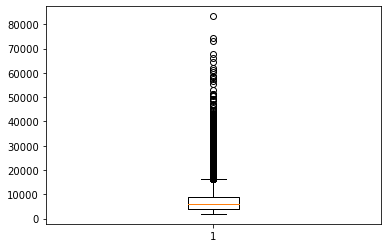

income


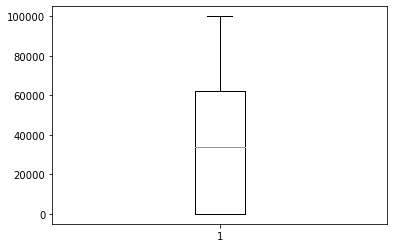

monthly_premium_auto


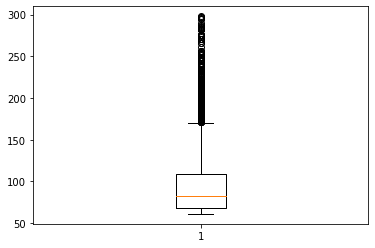

months_since_policy_inception


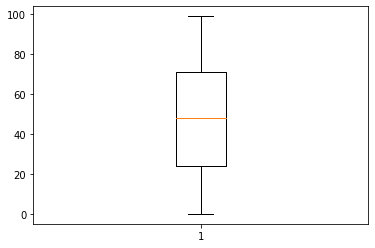

total_claim_amount


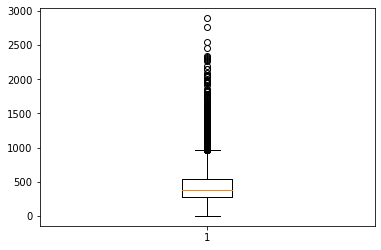

In [42]:
pintar_boxplot(continuous_df)

#### 11. Did you find outliers? Comment what you will do with them.



In [ ]:
def log_transfom_clean(x):
    if x>0:
        return np.log(x)
    else:
        return np.NAN

In [ ]:
customer_df.columns = list(map(log_transfom_clean, customer_df.columns))

TypeError: '>' not supported between instances of 'str' and 'int'

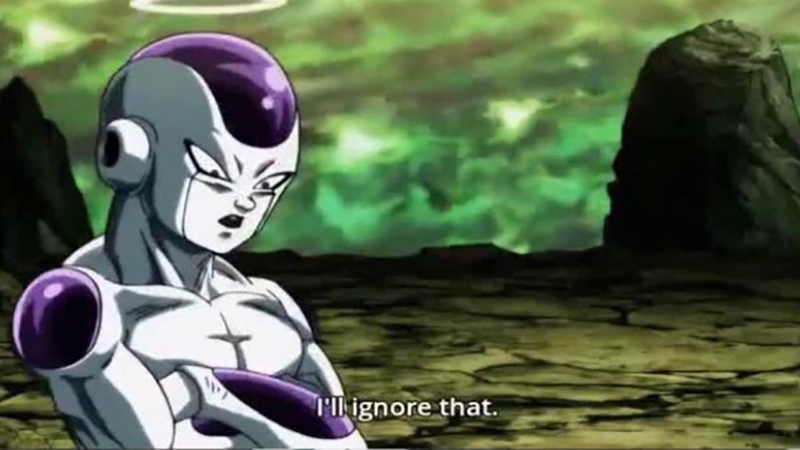

In [ ]:
from IPython.display import Image
Image("friza.jpg")